<a href="https://colab.research.google.com/github/mkatouda/placingmd/blob/main/placingmd_tutorial_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**placingmdチュートリアル**

本チュートリアルは
[placingmd](https://github.com/mkatouda/placingmd)を用いてタンパク質-リガンドドッキングシミュレーションとGromacs MDシミュレーション入力ファイル作成を行う手順を解説している。本チュートリアルはGoogle Colaboratoryで実行可能である。placingmdを使用する前にはぜひ動作させて結果を確認してほしい。

参考: 
*   [meekovinaチュートリアル](https://https://github.com/mkatouda/meekovina/blob/main/meekovina_tutorial_jp.ipynb)
*   [gmxplaチュートリアル](https://github.com/mkatouda/gmxpla/blob/main/gmxpla_tutorial_jp.ipynb)




# インストール

## miniconda実行環境のインストール

In [1]:
import os
os.environ['PYTHONPATH'] = ''
!curl -sSL https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -o /tmp/miniconda.sh
!bash /tmp/miniconda.sh -bfp /opt/miniconda3
os.environ['PATH'] = '/opt/miniconda3/bin:' + os.environ['PATH']
!conda config --add channels conda-forge
!conda update -n base -c defaults conda -y
!conda update -n base -c conda-forge python=3.8 -y

PREFIX=/opt/miniconda3
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py39h7f8727e_0
    - conda==4.12.0=py39h06a4308_0
    - cryptography==36.0.0=py39h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.4=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.

## 必要なconda-forgeライブラリのインストール

In [2]:
!conda install -c conda-forge pyyaml numpy ambertools acpype openbabel gromacs vina -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - acpype
    - ambertools
    - gromacs
    - numpy
    - openbabel
    - pyyaml
    - vina


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    acpype-2022.7.21           |     pyhd8ed1ab_0         4.9 MB  conda-forge
    ambertools-22.0            

## meekovinaとstage3のインストール

placingmdを実行するのに必要な[meekovina](https://github.com/mkatouda/meekovina)と[STaGe3](https://github.com/mkatouda/stage3)をgithubレポジトリからインストールする。:




In [3]:
!pip install git+https://github.com/mkatouda/meekovina.git
!pip install git+https://github.com/mkatouda/stage3.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/meekovina.git to /tmp/pip-req-build-r5_y7yr6
  Running command git clone -q https://github.com/mkatouda/meekovina.git /tmp/pip-req-build-r5_y7yr6
     |████████████████████████████████| 29.5 MB 1.3 MB/s 
     |████████████████████████████████| 89 kB 7.6 MB/s 
  Created wheel for meekovina: filename=meekovina-0.2.0-py3-none-any.whl size=8054 sha256=13cf3429bf4bf9bd93239b631f498c07362a9d1d11609771227b9cf89a3246ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-1ajciwc8/wheels/76/5b/22/e498ab96af9a52cb676dd35b645d5f54f06e5cddb294a132d6
Successfully built meekovina
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/stage3.git to /tmp/pip-req-build-yv6kq7my
  Running command git clone -q https://github.com/mkatouda/stage3.git /tmp/pip-req-build-yv6kq7my
  Created wheel 

## placingmdのインストール

In [4]:
!pip install git+https://github.com/mkatouda/placingmd.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/placingmd.git to /tmp/pip-req-build-fmqcqyb4
  Running command git clone -q https://github.com/mkatouda/placingmd.git /tmp/pip-req-build-fmqcqyb4
  Created wheel for placingmd: filename=placingmd-0.0.1-py3-none-any.whl size=6855 sha256=c8bb4cf692fcf37314900f24cdd5ec1afe03a5f2d8e5cd1c85b73ba7f22d4894
  Stored in directory: /tmp/pip-ephem-wheel-cache-yf9lsql1/wheels/e2/a7/dc/7315b5a3d1041f2a131e75d7e0f4966a02cedc38f2390f5211
Successfully built placingmd


## placingmdのヘルプの表示

In [5]:
!placingmd -h

usage: placingmd [-h] [-i INP] [-l LIGAND] [-s INPUT_SMILES] [-lr REFLIGAND]
                 [-rqt RECEPTOR_PDBQT] [-r RECEPTOR] [-t MD_RECEPTORTOPOLOGY]
                 [-o OUT] [-v] [--runvina] [--runmdinput]
                 [--vina_center_x VINA_CENTER_X]
                 [--vina_center_y VINA_CENTER_Y]
                 [--vina_center_z VINA_CENTER_Z] [--vina_size_x VINA_SIZE_X]
                 [--vina_size_y VINA_SIZE_Y] [--vina_size_z VINA_SIZE_Z]
                 [--vina_cpu VINA_CPU] [--vina_scoring VINA_SCORING]
                 [--vina_seed VINA_SEED]
                 [--vina_exhaustiveness VINA_EXHAUSTIVENESS]
                 [--vina_max_evals VINA_MAX_EVALS]
                 [--vina_num_modes VINA_NUM_MODES]
                 [--vina_min_rmsd VINA_MIN_RMSD]
                 [--vina_energy_range VINA_ENERGY_RANGE]
                 [--vina_spacing VINA_SPACING]
                 [--vina_verbosity VINA_VERBOSITY] [--vina_score_only]
                 [--vina_local_only] [--vi

# サンプルジョブ実行

## placingmdのgithubレポジトリのダウンロード

In [6]:
!git clone https://github.com/mkatouda/placingmd.git
%cd placingmd/example

Cloning into 'placingmd'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 99 (delta 56), reused 55 (delta 25), pack-reused 0
Unpacking objects: 100% (99/99), done.
/content/placingmd/example


## サンプル入力ファイルの確認

サンプル入力ファイルinput.ymlにplacingmdの入力キーワード(キーワードとその説明はplacingmd -hで確認可能)をyaml形式で記載して与えることができる。

In [7]:
!ls ./inputs
!cat ./inputs/input.yml

1iep_ligand.mol    1iep_ligand.sdf     1iep_receptorH.pdbqt
1iep_ligand.pdbqt  1iep_receptorH.pdb  input.yml
# System settings: required

ligand: './inputs/1iep_ligand.sdf'
refligand: './inputs/1iep_ligand.sdf'
receptor_pdbqt: './inputs/1iep_receptorH.pdbqt'
receptor: './inputs/1iep_receptorH.pdb'

# Job settings

out: '1iep_ligand'
verbose: True
runvina: True
runmdinput: True

# AutoDock Vina settings

vina_score_only: True
vina_size_x: 20.0
vina_size_y: 20.0
vina_size_z: 20.0
vina_cpu: 2
vina_seed: 1234
vina_exhaustiveness: 3
vina_num_modes: 9
vina_min_rmsd : 1
vina_energy_range : 3
vina_spacing : 0.375
vina_verbosity : 1
vina_exec : 'binary'
vina_bin_path : 'vina'

# MD input settings

md_ligand_id : [0] #[0, 1, 2]
md_ffligand: 'gaff'
md_ffpritein: 'amber99sb-ildn'
md_charge_method: 'am1bcc'
md_box_type: 'dodecahedron'
md_box_buff: 1.0
md_water_model: 'tip3p'
md_conc: 0.0
md_pname: 'NA'
md_nname: 'CL'


## サンプルジョブ実行

In [8]:
!placingmd -i ./inputs/input.yml

Namespace(inp='./inputs/input.yml', input_smiles=None, ligand=None, md_box_buffer=1.0, md_box_type='dodecahedron', md_calibration=None, md_charge_method='am1bcc', md_charge_multiplier=1.0, md_conc=0.0, md_ffligand='gaff', md_ffprotein=None, md_keep_ligand_name=False, md_ligand_id='0', md_nname='CL', md_ph=None, md_pname='NA', md_receptortopology=None, md_retain_charges=False, md_water_model=None, out=None, receptor=None, receptor_pdbqt=None, refligand=None, runmdinput=True, runvina=True, verbose=False, vina_bin_path='vina', vina_boxauto=False, vina_center_x=None, vina_center_y=None, vina_center_z=None, vina_cpu=4, vina_energy_range=3, vina_exec='lib', vina_exhaustiveness=8, vina_gybox_ratio=2.5, vina_local_only=False, vina_max_evals=0, vina_min_rmsd=1, vina_num_modes=9, vina_score_only=False, vina_scoring='vina', vina_seed=0, vina_size_x=22.5, vina_size_y=22.5, vina_size_z=22.5, vina_spacing=0.375, vina_verbosity=1)
======= Input configulations =======
ligand: ./inputs/1iep_ligand.sdf


## 出力ファイル確認

### Gromacs MD入力ファイル一式の所在確認

In [9]:
!ls ./1iep_ligand_vinaout_00_gaff

 1iep_ligand_vinaout_00_box.gro		      '#1iep_ligand_vinaout_00.top.2#'
 1iep_ligand_vinaout_00.gro		       1iep_receptorH.gro
 1iep_ligand_vinaout_00.itp		       1iep_receptorH.itp
 1iep_ligand_vinaout_00_solvated.gro	       1iep_receptorH.top
 1iep_ligand_vinaout_00_solvated_ionised.gro   index.ndx
 1iep_ligand_vinaout_00.top		       posre_1iep_ligand_vinaout_00.itp
'#1iep_ligand_vinaout_00.top.1#'	       posre_1iep_receptorH.itp


### Gromacs座標ファイル(gro)の確認

In [10]:
!cat ./1iep_ligand_vinaout_00_gaff/1iep_ligand_vinaout_00_solvated_ionised.gro

ストリーミング出力は最後の 5000 行に切り捨てられました。
13556SOL    HW243650   7.864   0.514   6.528
13557SOL     OW43651   7.456   1.326   5.786
13557SOL    HW143652   7.363   1.347   5.755
13557SOL    HW243653   7.466   1.227   5.799
13558SOL     OW43654   8.263   0.572   5.911
13558SOL    HW143655   8.270   0.483   5.865
13558SOL    HW243656   8.169   0.606   5.903
13559SOL     OW43657   7.921   0.500   5.777
13559SOL    HW143658   7.982   0.580   5.781
13559SOL    HW243659   7.826   0.531   5.784
13560SOL     OW43660   8.750   0.855   5.895
13560SOL    HW143661   8.664   0.824   5.937
13560SOL    HW243662   8.746   0.841   5.796
13561SOL     OW43663   8.836   1.573   6.063
13561SOL    HW143664   8.903   1.585   5.989
13561SOL    HW243665   8.796   1.662   6.086
13562SOL     OW43666   8.728   0.927   6.258
13562SOL    HW143667   8.788   0.846   6.260
13562SOL    HW243668   8.768   0.996   6.198
13563SOL     OW43669   8.120   1.616   5.740
13563SOL    HW143670   8.129   1.626   5.641
13563SOL    HW243671   

### Gromacsトポロジーファイル(top)の確認

In [11]:
!cat ./1iep_ligand_vinaout_00_gaff/1iep_ligand_vinaout_00.top

; Topology file generated by GaffForceFieldPlugin.py/.. 2022-10-30 14:36:16.180549

#include "amber99sb-ildn.ff/forcefield.itp"
#include "1iep_ligand_vinaout_00.itp"
#include "amber99sb-ildn.ff/tip3p.itp"
#include "amber99sb-ildn.ff/ions.itp"

#include "1iep_receptorH.itp"

[ system ]
1iep_ligand_vinaout_00 + Protein in water

[ molecules ]
; Compound                nmols
1iep_ligand_vinaout_00  1
Protein_chain_A     1
SOL         14720
NA               9


### Gromacsインデックスファイル(ndx)の確認

In [12]:
!cat ./1iep_ligand_vinaout_00_gaff/index.ndx

ストリーミング出力は最後の 5000 行に切り捨てられました。
22404 22405 22406 22407 22408 22409 22410 22411 22412 22413 22414 22415 22416 22417 22418
22419 22420 22421 22422 22423 22424 22425 22426 22427 22428 22429 22430 22431 22432 22433
22434 22435 22436 22437 22438 22439 22440 22441 22442 22443 22444 22445 22446 22447 22448
22449 22450 22451 22452 22453 22454 22455 22456 22457 22458 22459 22460 22461 22462 22463
22464 22465 22466 22467 22468 22469 22470 22471 22472 22473 22474 22475 22476 22477 22478
22479 22480 22481 22482 22483 22484 22485 22486 22487 22488 22489 22490 22491 22492 22493
22494 22495 22496 22497 22498 22499 22500 22501 22502 22503 22504 22505 22506 22507 22508
22509 22510 22511 22512 22513 22514 22515 22516 22517 22518 22519 22520 22521 22522 22523
22524 22525 22526 22527 22528 22529 22530 22531 22532 22533 22534 22535 22536 22537 22538
22539 22540 22541 22542 22543 22544 22545 22546 22547 22548 22549 22550 22551 22552 22553
22554 22555 22556 22557 22558 22559 22560 22561 22562 22563 22564 22

# [参考] Gromacs MDシミュレーション実行

placingmdで生成したGromacs MD入力ファイルを用いて、タンパク質-リガンド複合系のMDシミュレーションを実行する。

## エネルギー極小化実行


In [13]:
%cd ./1iep_ligand_vinaout_00_gaff
!gmx grompp -f ../mdp_ffamber/em.mdp -c ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -o em.tpr -maxwarn 10
!gmx mdrun -deffnm em

/content/placingmd/example/1iep_ligand_vinaout_00_gaff
                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/placingmd/example/1iep_ligand_vinaout_00_gaff
Command line:
  gmx grompp -f ../mdp_ffamber/em.mdp -c ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -o em.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/em.mdp]:
  With Verlet lists the optimal nstlist is >= 10, with GPUs >= 20. Note
  that with the Verlet scheme, nstlist has no effect on the accuracy of
  your simulation.


NOTE 2 [file ../mdp_ffamber/em.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -186652845

Generated 3160 of the 3160 non-bonded parameter comb

## NVT平衡化MD実行

In [14]:
!gmx grompp -f ../mdp_ffamber/nvt_eq.mdp -c ./em.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -o nvt_eq.tpr -maxwarn 10
!gmx mdrun -deffnm nvt_eq

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/placingmd/example/1iep_ligand_vinaout_00_gaff
Command line:
  gmx grompp -f ../mdp_ffamber/nvt_eq.mdp -c ./em.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -o nvt_eq.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/nvt_eq.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -83886342

Generated 3160 of the 3160 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 3160 of the 3160 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '1iep_ligand_vinaout_00'

turning H bonds into constraints...

Excluding 3 bonded ne

## NPT平衡化MD実行

In [15]:
!gmx grompp -f ../mdp_ffamber/npt_eq.mdp -c ./nvt_eq.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -t nvt_eq.cpt -o npt_eq.tpr -maxwarn 10
!gmx mdrun -deffnm npt_eq

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/placingmd/example/1iep_ligand_vinaout_00_gaff
Command line:
  gmx grompp -f ../mdp_ffamber/npt_eq.mdp -c ./nvt_eq.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -t nvt_eq.cpt -o npt_eq.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/npt_eq.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -672437629

Generated 3160 of the 3160 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 3160 of the 3160 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '1iep_ligand_vinaout_00'

turning H bonds into constraints...

Ex

## NPTプロダクトMD実行

In [16]:
!gmx grompp -f ../mdp_ffamber/npt_prod.mdp -c ./npt_eq.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -t npt_eq.cpt -o npt_prod.tpr -maxwarn 10
!gmx mdrun -deffnm npt_prod

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/placingmd/example/1iep_ligand_vinaout_00_gaff
Command line:
  gmx grompp -f ../mdp_ffamber/npt_prod.mdp -c ./npt_eq.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -t npt_eq.cpt -o npt_prod.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/npt_prod.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to -855936077

Generated 3160 of the 3160 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 3160 of the 3160 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '1iep_ligand_vinaout_00'

turning H bonds into constraints.

In [17]:
!gmx grompp -f ../mdp_ffamber/ie.mdp -c ./npt_eq.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -t npt_eq.cpt -o npt_prod_ie.tpr -maxwarn 10
!gmx mdrun -deffnm npt_prod_ie -rerun npt_prod.xtc

                :-) GROMACS - gmx grompp, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/placingmd/example/1iep_ligand_vinaout_00_gaff
Command line:
  gmx grompp -f ../mdp_ffamber/ie.mdp -c ./npt_eq.gro -r ./1iep_ligand_vinaout_00_solvated_ionised.gro -p ./1iep_ligand_vinaout_00.top -n ./index.ndx -t npt_eq.cpt -o npt_prod_ie.tpr -maxwarn 10

Ignoring obsolete mdp entry 'title'
Ignoring obsolete mdp entry 'ns_type'

NOTE 1 [file ../mdp_ffamber/ie.mdp]:
  You have set rlist larger than the interaction cut-off, but you also have
  verlet-buffer-tolerance > 0. Will set rlist using verlet-buffer-tolerance.

Setting the LD random seed to 1325309783

Generated 3160 of the 3160 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 0.5

Generated 3160 of the 3160 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type '1iep_ligand_vinaout_00'

turning H bonds into constraints...

Exclu

## NPTプロダクトMD結果解析

NPTプロダクトMDの解析を[gmxpla](https://github.com/mkatouda/gmxpla)を用いて行ってみる。なお、解析には通常のGromacsモジュールやMDAnalysisなど好みのツールを用いてもよい。



### gmxplaのインストール 

In [18]:
!pip install git+https://github.com/mkatouda/gmxpla.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/gmxpla.git to /tmp/pip-req-build-jdjcll48
  Running command git clone -q https://github.com/mkatouda/gmxpla.git /tmp/pip-req-build-jdjcll48
  Created wheel for gmxpla: filename=gmxpla-0.0.1-py3-none-any.whl size=5137 sha256=67b1588421f507ddc292f3473d388f155957ced1d9a1420b6e4423843d800107
  Stored in directory: /tmp/pip-ephem-wheel-cache-im8nn9_v/wheels/b7/17/7d/92484efb4da98fd6a761661f4ee7e8509cb4b81698f971d761
Successfully built gmxpla


In [19]:
!gmxpla -h

usage: gmxpla [-h] [-i INP] [-t TPR] [-x XTC] [-n NDX] [-v]

python wrapper of gromax MD trajectory analysis tools

optional arguments:
  -h, --help         show this help message and exit
  -i INP, --inp INP  yaml style input file, overwriting argument values (default: None)
  -t TPR, --tpr TPR  Gromacs topology path (tpr or gro file) (default: None)
  -x XTC, --xtc XTC  Gromacs trajectory path (xtc file) (default: None)
  -n NDX, --ndx NDX  Gromacs index path (ndx file) (default: None)
  -v, --verbose      Verbose output. (default: False)


gmxpla入力yamlファイルの作成: gromacs MD計算出力ファイルパスを記載

In [20]:
s = "edr: './npt_prod_ie.edr'\ntpr: './npt_prod.tpr'\nxtc: './npt_prod.xtc'\nndx: './index.ndx'"
with open('input_gmxpla.yml', mode='w') as fout:
  fout.write(s)

In [21]:
!cat ./input_gmxpla.yml

edr: './npt_prod_ie.edr'
tpr: './npt_prod.tpr'
xtc: './npt_prod.xtc'
ndx: './index.ndx'

### gmxpla実行

In [22]:
!gmxpla -i ./input_gmxpla.yml

Namespace(inp='./input_gmxpla.yml', ndx=None, tpr=None, verbose=False, xtc=None)
======= Input configulations =======
edr: ./npt_prod_ie.edr
tpr: ./npt_prod.tpr
xtc: ./npt_prod.xtc
ndx: ./index.ndx
inp: ./input_gmxpla.yml
verbose: False
echo Coul-SR:Protein-LIG
 LJ-SR:Protein-LIG
 0
 | gmx energy -f ./npt_prod_ie.edr -o npt_prod_ie_ie_component.xvg
                :-) GROMACS - gmx energy, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/placingmd/example/1iep_ligand_vinaout_00_gaff
Command line:
  gmx energy -f ./npt_prod_ie.edr -o npt_prod_ie_ie_component.xvg

Opened ./npt_prod_ie.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.    

### ドッキングスコアの確認

リガンドドッキングスコアとして、NPT平衡MD計算結果の相互作用エネルギー(時間平均)、リガンドRMSD(時間平均)、リガンドRMSFをcsv形式で出力している。

In [23]:
import pandas as pd
df = pd.read_csv('./docking_score.csv')
df

,IE_score,RMSD_score,RMSF_score
0,-287.509103,0.086522,0.023949


相互作用エネルギー出力結果csvファイルの確認

In [24]:
df = pd.read_csv('./npt_prod_ie_ie_sum.csv')
df

,Time (ps),(kJ/mol)
0,0.0,-284.299988
1,1.0,-277.156250
2,2.0,-272.777100
3,3.0,-280.563812
4,4.0,-298.081146
5,5.0,-295.837341
6,6.0,-299.109406
7,7.0,-297.274414
8,8.0,-285.528412
9,9.0,-285.948303


RMSD出力結果csvファイルの確認

In [25]:
df = pd.read_csv('./npt_prod_nowat_fit_rms.csv')
df

,Time (ps),RMSD (nm)
0,0.0,0.000490
1,1.0,0.075064
2,2.0,0.099299
3,3.0,0.095574
4,4.0,0.098527
5,5.0,0.081209
6,6.0,0.099634
7,7.0,0.089343
8,8.0,0.107672
9,9.0,0.112033


RMSF出力結果csvファイルの確認

In [26]:
df = pd.read_csv('./npt_prod_nowat_fit_rmsf.csv')
df

,Atom,(nm)
0,1.0,0.0307
1,2.0,0.0240
2,3.0,0.0250
3,4.0,0.0239
4,5.0,0.0179
5,6.0,0.0197
6,7.0,0.0190
7,8.0,0.0326
8,9.0,0.0145
9,10.0,0.0234


## MDトラジェクトリ可視化データ表示

In [27]:
from PIL import Image

### 相互作用エネルギートラジェクトリの表示

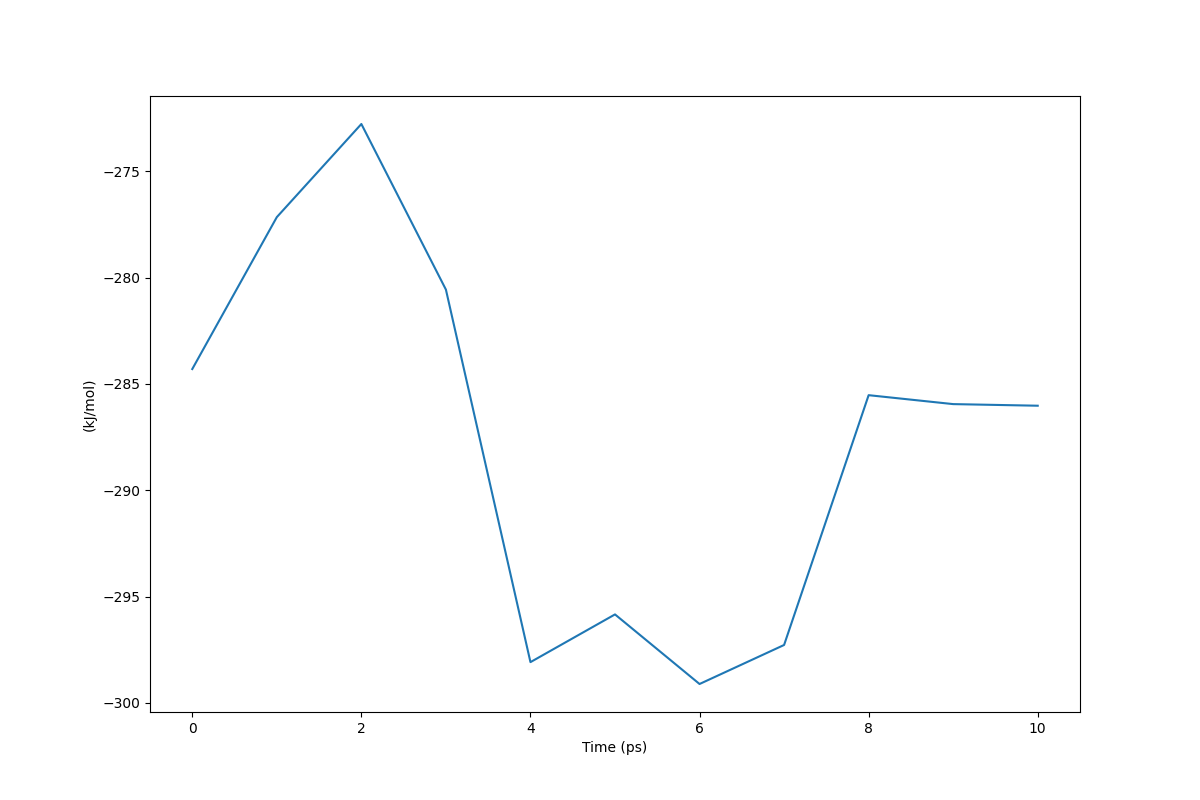

In [28]:
im = Image.open('./npt_prod_ie_ie_sum.png')
im

### リガンドRMSDトラジェクトリの表示

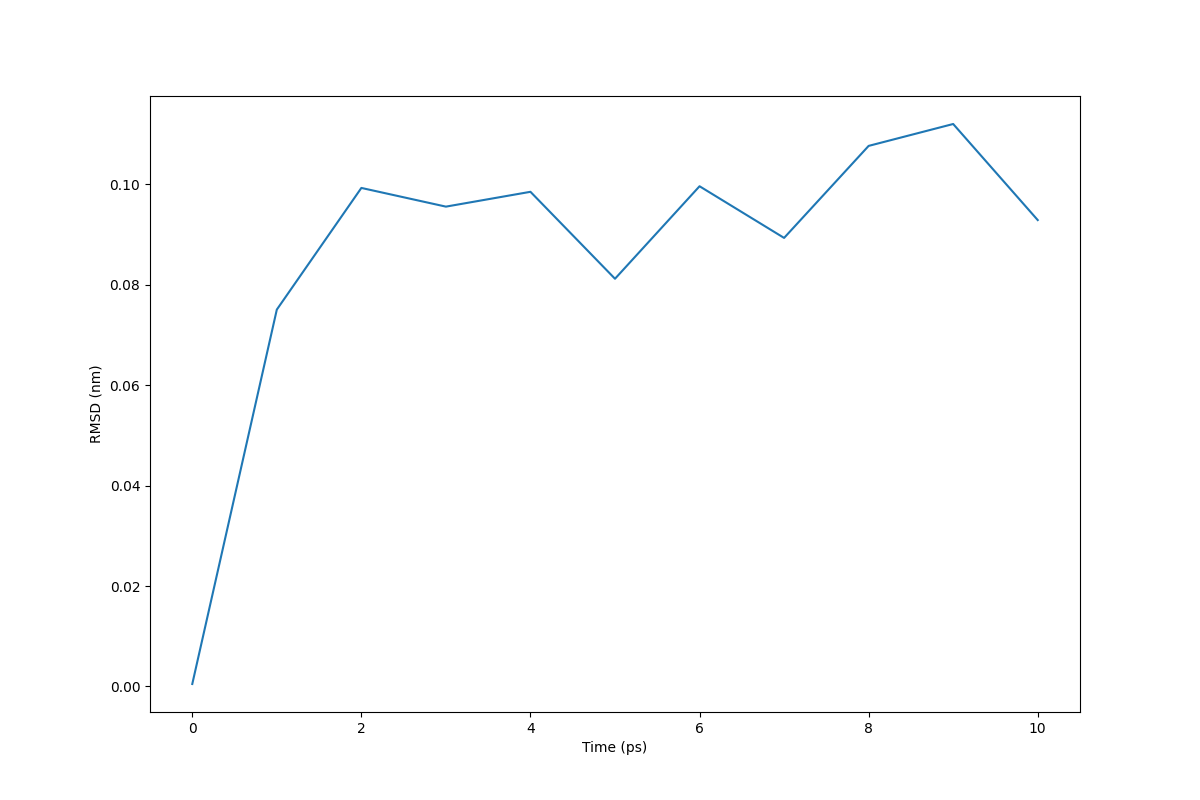

In [29]:
im = Image.open('./npt_prod_nowat_fit_rms.png')
im

### リガンドRMSFの表示

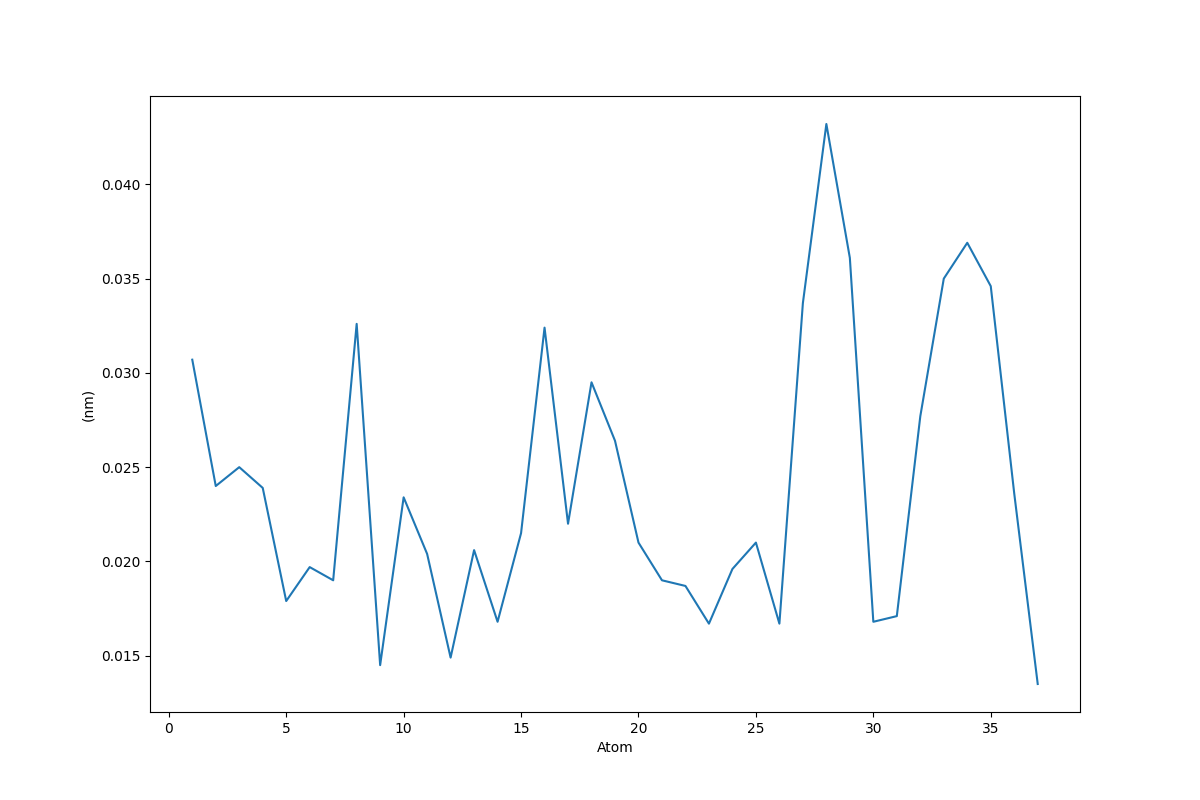

In [30]:
im = Image.open('./npt_prod_nowat_fit_rmsf.png')
im